In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import logging

# Change file_path as necessary
file_path = "../Relevant data" 
file_path = "C:\\Users\\ciroccol\\Dropbox\\_repo\\Relevant data\\Capstone"

os.chdir(file_path)

In [2]:
import scipy
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# read in the data

In [3]:
bms_complete = pd.read_csv("bms_complete.csv", parse_dates=True)
bms_save = bms_complete.copy()
training_start_index = bms_complete[bms_complete.timestamp == '2013-01-01 00:00:00'].index.values[0]
training_end_index = bms_complete[bms_complete.timestamp == '2016-01-01 00:00:00'].index.values[0]
bms_complete = bms_complete.iloc[training_start_index:training_end_index]

Text(0,0.5,'Average daily kW')

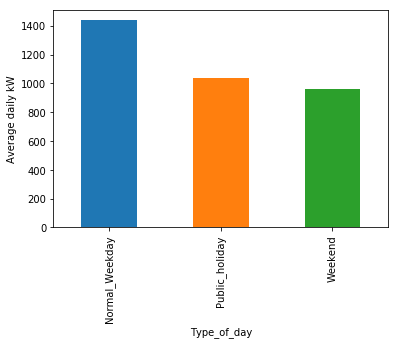

In [4]:
grouped_by_daytype = bms_complete.groupby(['Type_of_day'])['kW'].mean()
grouped_by_daytype
ax = grouped_by_daytype.plot.bar()
ax.set_ylabel("Average daily kW")

In [5]:
bms_kW = bms_complete[['kW']]

# analysis 

## seasonality

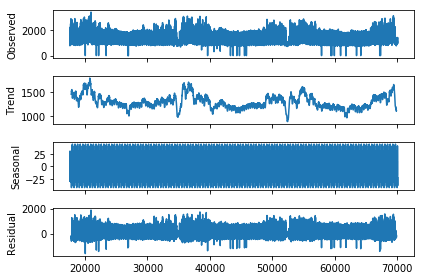

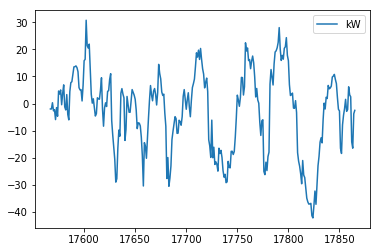

In [6]:
#checking trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(bms_kW, model='additive',freq=421)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
result.seasonal[1:300].plot()

because there are sufficient zero values to be of concern we're going to do something about it

In [7]:
bms_kW = bms_kW.where(bms_kW['kW'] > 1.0e-8, bms_kW['kW'].mean())

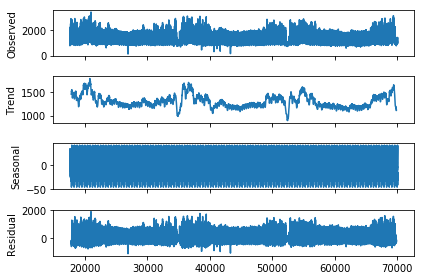

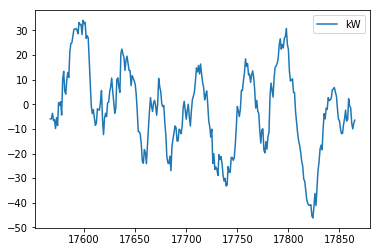

In [8]:
#checking trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(bms_kW, model='additive',freq=421)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
result.seasonal[1:300].plot()

because that worked let's just do some Magic!

In [9]:
# bms_complete['kW_saved'] = bms_complete['kW']
# bms_complete['kW'] = bms_complete['kW'].where(bms_complete['kW'] > 1.0e-8, bms_complete['kW'].mean())

In [10]:
bms_weekday = bms_complete[bms_complete.Type_of_day == 'Normal_Weekday'].reset_index()
bms_weekday

,index,timestamp,kW,kVA,Temp,Humidity,Type_of_day
0,17566,2013-01-01 00:00:00,879.796,956.3,21.6,45.0,Normal_Weekday
1,17567,2013-01-01 00:30:00,862.776,937.8,21.2,46.0,Normal_Weekday
2,17568,2013-01-01 01:00:00,845.204,918.7,20.2,50.0,Normal_Weekday
3,17569,2013-01-01 01:30:00,839.960,913.0,18.7,52.0,Normal_Weekday
4,17570,2013-01-01 02:00:00,828.644,900.7,18.5,50.0,Normal_Weekday
5,17571,2013-01-01 02:30:00,848.056,921.8,18.4,47.0,Normal_Weekday
6,17572,2013-01-01 03:00:00,849.804,923.7,18.2,46.0,Normal_Weekday
7,17573,2013-01-01 03:30:00,854.956,929.3,18.0,46.0,Normal_Weekday
8,17574,2013-01-01 04:00:00,864.340,939.5,17.3,46.0,Normal_Weekday
9,17575,2013-01-01 04:30:00,852.840,927.0,16.9,49.0,Normal_Weekday


## Fourier series

In [11]:
# Adapted from John Boland's 'Power_Spectrum_Rwine.xls' worksheet\n",

def power(values,timestamps,freq):
    N2 = len(values)/2
    cos_power = (np.cos(np.pi*(freq-1)/N2*timestamps)*values)[1:].sum()/N2
    sin_power = (np.sin(np.pi*(freq-1)/N2*timestamps)*values)[1:].sum()/N2
    return cos_power**2 + sin_power**2


In [12]:
powerlist = []
for i in range(1,4000):
    powerlist.append(power(bms_weekday.kW.values, pd.Series(range(1,len(bms_weekday.kW.values)+1)),i))
    
powerlist

[8266200.095748596,
 1235.809999756194,
 1125.4370436834743,
 18973.412110293535,
 209.0703895116019,
 258.1777581934332,
 919.2762341878415,
 181.61168721017955,
 192.35302698010787,
 1986.9694466792882,
 76.8746119343392,
 3.3954423346456473,
 2360.9963503835597,
 210.12922983041574,
 474.29833714072475,
 33.0760195148185,
 1237.6453913941098,
 403.3650490593768,
 144.0747550802596,
 493.39810360643713,
 400.5134881431545,
 251.76827484359092,
 326.90636389965937,
 190.78865251738202,
 127.29896176721255,
 55.01976170548967,
 390.6557720658168,
 315.0574601617397,
 175.74664891064353,
 467.46226886521885,
 72.29144040071354,
 194.15977794277504,
 248.74603067292932,
 335.53483905830797,
 174.59591133704055,
 318.4583538448481,
 829.0042418654751,
 396.0202441342012,
 597.793641244145,
 1107.1722207211287,
 292.18671200832637,
 191.81467309336182,
 236.42988058633856,
 512.8960031827442,
 512.0508684138238,
 47.63943277822969,
 288.1331202515811,
 679.0541987548248,
 24.83391366331326

In [13]:
powerseries = pd.Series(powerlist)
df = powerseries.nlargest(50).sort_values(ascending = False).reset_index()
df['day_cycles'] = (df[df.columns[0]] + 1) / 48
df

,index,0,day_cycles
0,0,8.266200e+06,0.020833
1,760,3.810327e+05,15.854167
2,3,1.897341e+04,0.083333
3,1520,1.376897e+04,31.687500
4,3040,6.002345e+03,63.354167
5,763,3.498011e+03,15.916667
6,2280,2.504309e+03,47.520833
7,757,2.380254e+03,15.791667
8,12,2.360996e+03,0.270833
9,9,1.986969e+03,0.208333


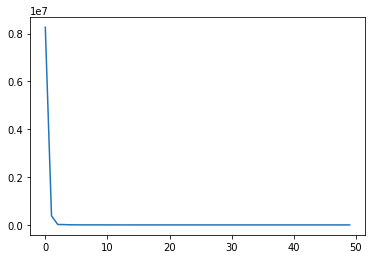

In [14]:
df[df.columns[1]].plot()

In [15]:
# Set frequencies
daily = 2*np.pi/2/24

freqs = {
    'daily':daily,
    'yearly':(1/365.24219)*daily,
    'half_yearly':(1/365.24219*2)*daily,
    'twice_a_day' : 2*daily
    #'freq1' : daily/3.8,
    #'freq2' : daily/7.68,
    #'freq3' : daily/ 0.0413,
    #'freq4' : daily/0.0645
        }

In [16]:
def fourier_terms(time_stamp,**args):
    M = np.empty(shape=(len(time_stamp),len(args)*2))
    freq_names = []
    for i, (k,v) in enumerate(args.items()):
        M[:,2*i  ] = np.cos(v * time_stamp)
        M[:,2*i+1] = np.sin(v * time_stamp)
        freq_names.append(k + '_cos')
        freq_names.append(k + '_sin')
    return([M,freq_names])

### weekday model

In [17]:
weekday_vals = bms_weekday.index.values
X,X_names = fourier_terms(weekday_vals,**freqs)

In [18]:
normal_weekdays_withfits = pd.concat(
    [bms_weekday, pd.DataFrame(X, columns=X_names, index=bms_weekday.index)], axis=1)
normal_weekdays_withfits

,index,timestamp,kW,kVA,Temp,Humidity,Type_of_day,daily_cos,daily_sin,yearly_cos,yearly_sin,half_yearly_cos,half_yearly_sin,twice_a_day_cos,twice_a_day_sin
0,17566,2013-01-01 00:00:00,879.796,956.3,21.6,45.0,Normal_Weekday,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000e+00
1,17567,2013-01-01 00:30:00,862.776,937.8,21.2,46.0,Normal_Weekday,9.914449e-01,1.305262e-01,1.000000,0.000358,1.000000,0.000717,9.659258e-01,2.588190e-01
2,17568,2013-01-01 01:00:00,845.204,918.7,20.2,50.0,Normal_Weekday,9.659258e-01,2.588190e-01,1.000000,0.000717,0.999999,0.001434,8.660254e-01,5.000000e-01
3,17569,2013-01-01 01:30:00,839.960,913.0,18.7,52.0,Normal_Weekday,9.238795e-01,3.826834e-01,0.999999,0.001075,0.999998,0.002150,7.071068e-01,7.071068e-01
4,17570,2013-01-01 02:00:00,828.644,900.7,18.5,50.0,Normal_Weekday,8.660254e-01,5.000000e-01,0.999999,0.001434,0.999996,0.002867,5.000000e-01,8.660254e-01
5,17571,2013-01-01 02:30:00,848.056,921.8,18.4,47.0,Normal_Weekday,7.933533e-01,6.087614e-01,0.999998,0.001792,0.999994,0.003584,2.588190e-01,9.659258e-01
6,17572,2013-01-01 03:00:00,849.804,923.7,18.2,46.0,Normal_Weekday,7.071068e-01,7.071068e-01,0.999998,0.002150,0.999991,0.004301,6.123234e-17,1.000000e+00
7,17573,2013-01-01 03:30:00,854.956,929.3,18.0,46.0,Normal_Weekday,6.087614e-01,7.933533e-01,0.999997,0.002509,0.999987,0.005017,-2.588190e-01,9.659258e-01
8,17574,2013-01-01 04:00:00,864.340,939.5,17.3,46.0,Normal_Weekday,5.000000e-01,8.660254e-01,0.999996,0.002867,0.999984,0.005734,-5.000000e-01,8.660254e-01
9,17575,2013-01-01 04:30:00,852.840,927.0,16.9,49.0,Normal_Weekday,3.826834e-01,9.238795e-01,0.999995,0.003226,0.999979,0.006451,-7.071068e-01,7.071068e-01


In [19]:
mod = sm.OLS(normal_weekdays_withfits['kW'], sm.add_constant(normal_weekdays_withfits[X_names]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     kW   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:53:26   Log-Likelihood:            -2.5134e+05
No. Observations:               36480   AIC:                         5.027e+05
Df Residuals:                   36471   BIC:                         5.028e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1436.0026      1.248   11

#### save the resulting parameters 

In [20]:
weekday_params = res.params

Text(0,0.5,'kW')

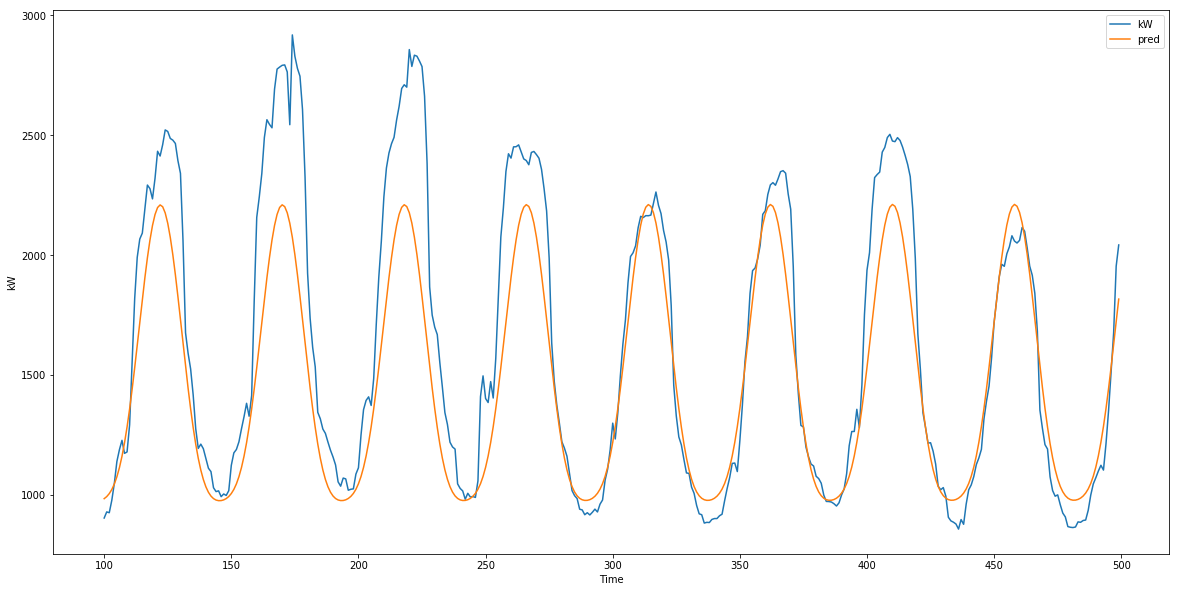

In [21]:
normal_weekdays_withfits['pred'] = (
    (res.params[1:] * normal_weekdays_withfits[X_names]).sum(axis=1) + res.params.const)
ax = normal_weekdays_withfits.iloc[100:500].plot(y=['kW','pred'] ,figsize=(20,10))
ax.set_xlabel("Time")
ax.set_ylabel("kW")

### weekend model 
public holiday data was ignored

In [22]:
#Fourier series for weekends and public holidays
#extract data
bms_weekend = bms_complete[bms_complete.Type_of_day != 'Normal_Weekday'].reset_index()
bms_weekend

,index,timestamp,kW,kVA,Temp,Humidity,Type_of_day
0,17758,2013-01-05 00:00:00,1098.020,1193.5,28.1,39.0,Weekend
1,17759,2013-01-05 00:30:00,1086.796,1181.3,27.0,41.0,Weekend
2,17760,2013-01-05 01:00:00,1049.076,1140.3,25.7,44.0,Weekend
3,17761,2013-01-05 01:30:00,1033.160,1123.0,24.9,46.0,Weekend
4,17762,2013-01-05 02:00:00,956.340,1039.5,24.6,47.0,Weekend
5,17763,2013-01-05 02:30:00,989.000,1075.0,24.7,47.0,Weekend
6,17764,2013-01-05 03:00:00,976.120,1061.0,24.3,46.0,Weekend
7,17765,2013-01-05 03:30:00,984.216,1069.8,23.6,45.0,Weekend
8,17766,2013-01-05 04:00:00,1000.040,1087.0,23.2,44.0,Weekend
9,17767,2013-01-05 04:30:00,985.596,1071.3,22.8,47.0,Weekend


In [23]:
X,X_names = fourier_terms(bms_weekend.index.values,**freqs)
weekends_publicholidays_fits = pd.concat(
    [bms_weekend, pd.DataFrame(X, columns=X_names, index=bms_weekend.index)], axis=1)
mod = sm.OLS(weekends_publicholidays_fits['kW'], sm.add_constant(weekends_publicholidays_fits[X_names]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     kW   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     374.7
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:53:27   Log-Likelihood:            -1.0246e+05
No. Observations:               16074   AIC:                         2.049e+05
Df Residuals:                   16065   BIC:                         2.050e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             971.5224      1.144    8

#### save the resulting parameters 

In [24]:
weekend_params = res.params

Text(17.2,0.5,'kW')

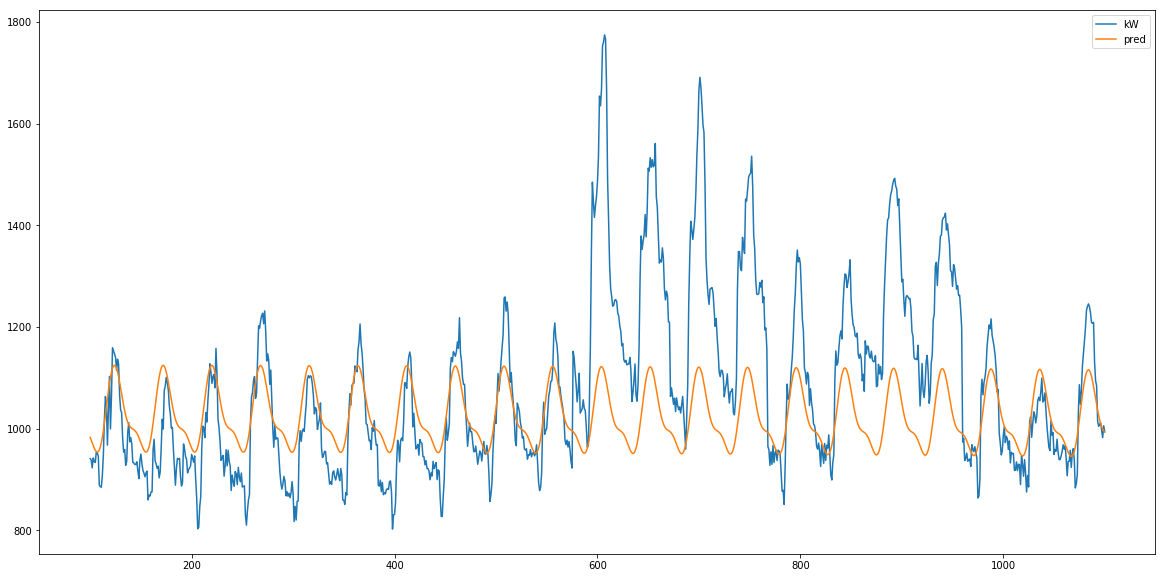

In [25]:
weekends_publicholidays_fits['pred'] = (
    (res.params[1:] * weekends_publicholidays_fits[X_names]).sum(axis=1) + res.params.const)
weekends_publicholidays_fits.loc[100:1100].plot(y=['kW','pred'] ,figsize=(20,10))
ax.set_xlabel("Time")
ax.set_ylabel("kW")

In [26]:
#get future weekend predictions


### combined result

Text(0,0.5,'kW')

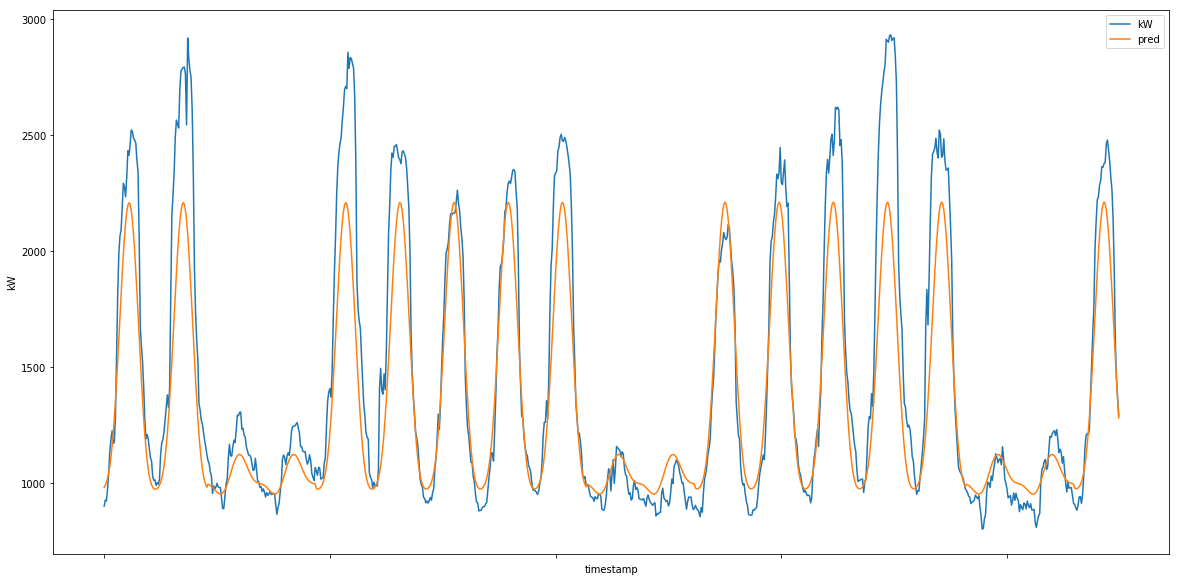

In [27]:
combinedfits = pd.concat(
    [weekends_publicholidays_fits,normal_weekdays_withfits], axis = 0).sort_values('timestamp').reset_index()
# combinedfits = combinedfits.drop('level_0', axis = 1)
ax = combinedfits.iloc[100:1000].plot(x= "timestamp",y=['kW','pred'] ,figsize=(20,10))
ax.set_ylabel("kW")

#### residual analysis 

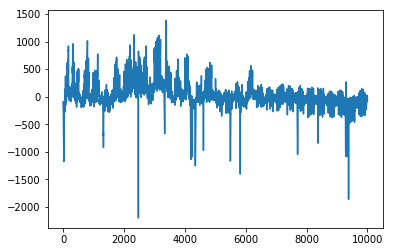

In [28]:
#Getting residuals after modelling the seasonality
combinedfits['resids_from_fourier'] = combinedfits['kW'] - combinedfits['pred']
combinedfits['resids_from_fourier'][0:10_000].plot()

# statistical residual modelling

In [29]:
model = sm.OLS(combinedfits['resids_from_fourier'], combinedfits[['Temp', 'Humidity']]).fit()
combinedfits['regression_fits'] = model.predict(combinedfits[['Temp', 'Humidity']])
print(model.summary()) 

                             OLS Regression Results                            
Dep. Variable:     resids_from_fourier   R-squared:                       0.228
Model:                             OLS   Adj. R-squared:                  0.228
Method:                  Least Squares   F-statistic:                     7782.
Date:                 Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                         21:53:28   Log-Likelihood:            -3.4951e+05
No. Observations:                52554   AIC:                         6.990e+05
Df Residuals:                    52552   BIC:                         6.990e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp           8.6917      0.071    121.96

In [30]:
#ARIMAX with Temp Humidity and residuals
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults

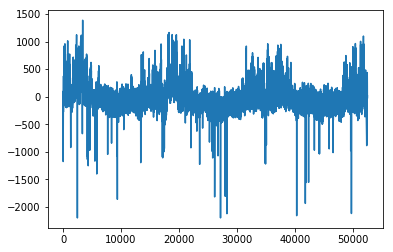

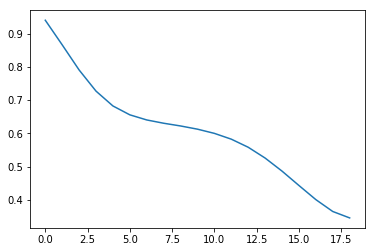

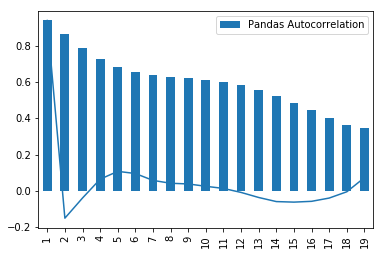

(-46.22310233985069,
 0.0,
 1,
 52552,
 {'1%': -3.430474440924146,
  '5%': -2.8615950003916564,
  '10%': -2.566799274879202},
 598395.3429321048)

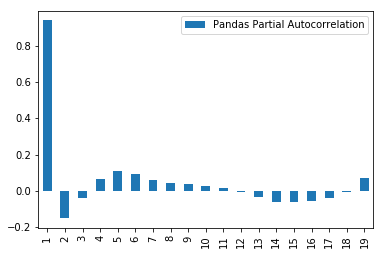

In [31]:
#pre ARIMA analysis
demand = combinedfits['resids_from_fourier']

plt.plot(demand)
plt.show()
acf_1 =  acf(demand)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(demand)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(demand, 1)
result

In [32]:
#ARIMAX model
arimax_model=ARIMA(
    endog=combinedfits[['resids_from_fourier']],exog=combinedfits[['Temp','Humidity']],order=[2,0,0])

In [33]:
results3=arimax_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [34]:
print(results3.summary())

                               ARMA Model Results                              
Dep. Variable:     resids_from_fourier   No. Observations:                52554
Model:                      ARMA(2, 0)   Log Likelihood             -297160.151
Method:                        css-mle   S.D. of innovations             69.091
Date:                 Sun, 30 Jun 2019   AIC                         594332.302
Time:                         21:53:32   BIC                         594385.520
Sample:                              0   HQIC                        594348.934
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -489.5518      8.335    -58.734      0.000    -505.888    -473.216
Temp                         15.0925      0.293     51.473      0.000      14.

Text(0,0.5,'kW')

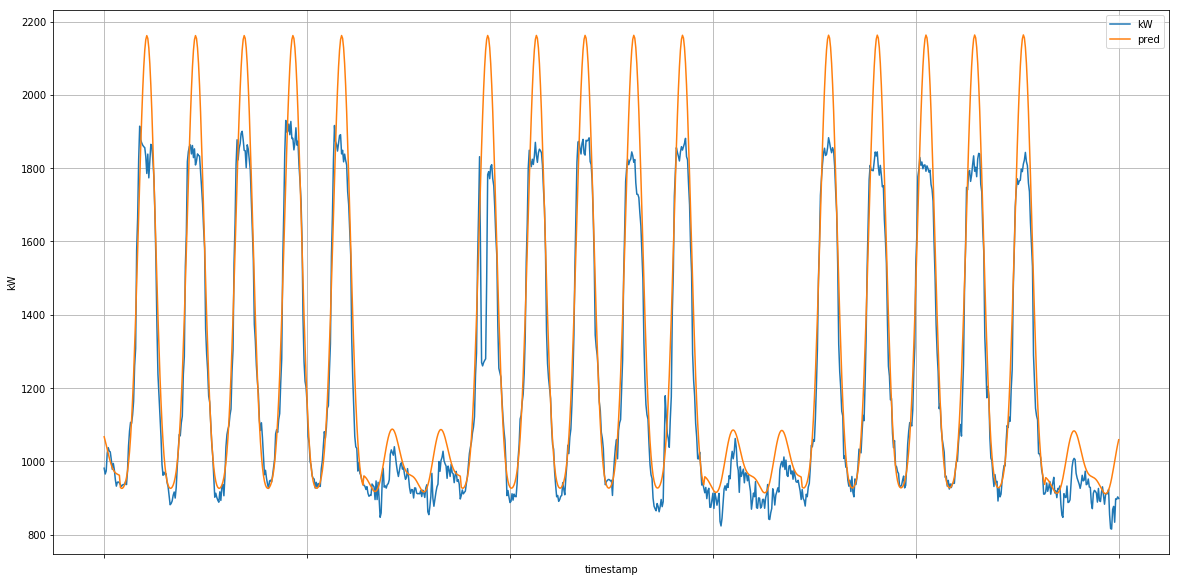

In [35]:
ax = combinedfits.loc[8000:9000].plot(x='timestamp', y=['kW','pred'] ,figsize=(20,10), grid=True  )
ax.set_ylabel("kW")

Text(0,0.5,'kW')

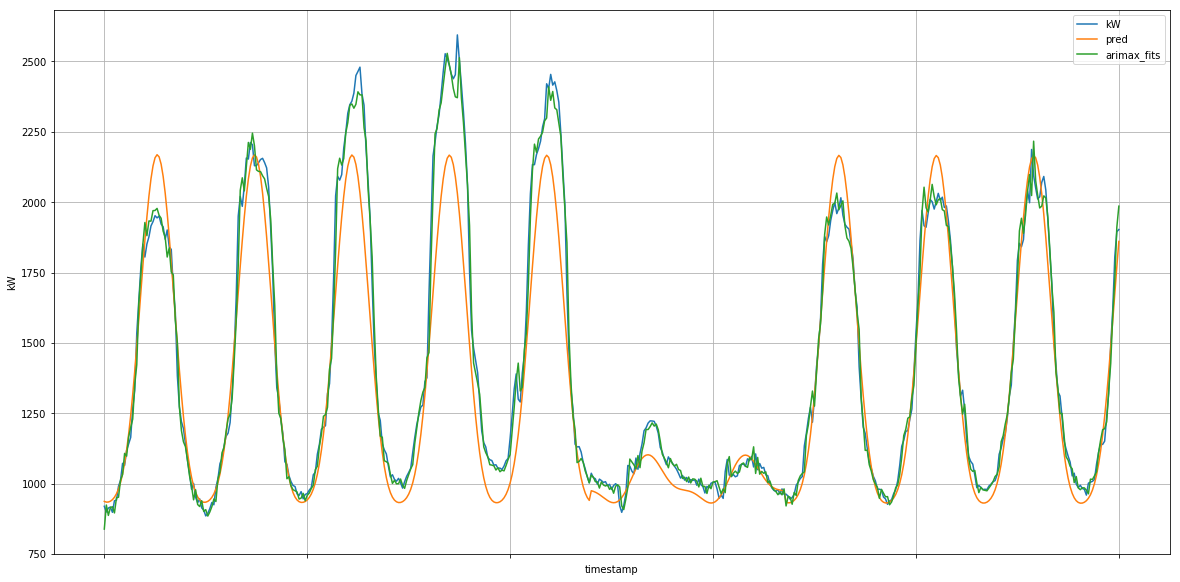

In [36]:
fits = results3.fittedvalues
#append 0 in first element if differenced for modelling
#fits = np.concatenate([[0],fits])
combinedfits['arimax_fits'] = combinedfits['pred'] + fits
combinedfits['arimax_resids'] = combinedfits['kW'] - combinedfits['arimax_fits']
ax = combinedfits.loc[6000:6500].plot(x='timestamp', y=['kW','pred','arimax_fits'] ,figsize=(20,10), grid=True  )
ax.set_ylabel("kW")

Text(0,0.5,'Residuals')

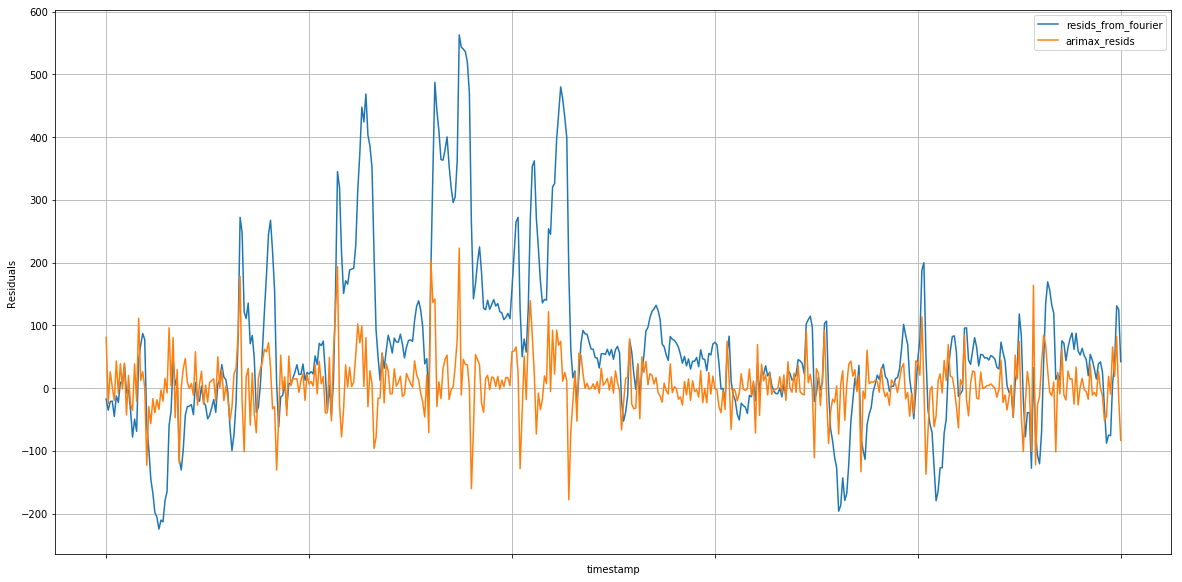

In [37]:
ax = combinedfits.loc[6000:6500].plot(x='timestamp', y=['resids_from_fourier','arimax_resids'] ,figsize=(20,10), grid=True  )
ax.set_ylabel("Residuals")

In [38]:
#Future predictions/ validation
combinedfits

,level_0,index,timestamp,kW,kVA,Temp,Humidity,Type_of_day,daily_cos,daily_sin,...,yearly_sin,half_yearly_cos,half_yearly_sin,twice_a_day_cos,twice_a_day_sin,pred,resids_from_fourier,regression_fits,arimax_fits,arimax_resids
0,0,17566,2013-01-01 00:00:00,879.796,956.3,21.6,45.0,Normal_Weekday,1.000000e+00,0.000000e+00,...,0.000000,1.000000,0.000000,1.000000e+00,0.000000e+00,975.980007,-96.184007,80.052707,974.445675,-94.649675
1,1,17567,2013-01-01 00:30:00,862.776,937.8,21.2,46.0,Normal_Weekday,9.914449e-01,1.305262e-01,...,0.000358,1.000000,0.000717,9.659258e-01,2.588190e-01,973.435441,-110.659441,74.182942,881.672887,-18.896887
2,2,17568,2013-01-01 01:00:00,845.204,918.7,20.2,50.0,Normal_Weekday,9.659258e-01,2.588190e-01,...,0.000717,0.999999,0.001434,8.660254e-01,5.000000e-01,973.756862,-128.552862,55.918913,869.474633,-24.270633
3,3,17569,2013-01-01 01:30:00,839.960,913.0,18.7,52.0,Normal_Weekday,9.238795e-01,3.826834e-01,...,0.001075,0.999998,0.002150,7.071068e-01,7.071068e-01,976.651523,-136.691523,38.095178,840.372955,-0.412955
4,4,17570,2013-01-01 02:00:00,828.644,900.7,18.5,50.0,Normal_Weekday,8.660254e-01,5.000000e-01,...,0.001434,0.999996,0.002867,5.000000e-01,8.660254e-01,982.190329,-153.546329,41.142987,846.148185,-17.504185
5,5,17571,2013-01-01 02:30:00,848.056,921.8,18.4,47.0,Normal_Weekday,7.933533e-01,6.087614e-01,...,0.001792,0.999994,0.003584,2.588190e-01,9.659258e-01,990.798425,-142.742425,47.453046,834.222723,13.833277
6,6,17572,2013-01-01 03:00:00,849.804,923.7,18.2,46.0,Normal_Weekday,7.071068e-01,7.071068e-01,...,0.002150,0.999991,0.004301,6.123234e-17,1.000000e+00,1003.212505,-153.408505,48.107779,865.773707,-15.969707
7,7,17573,2013-01-01 03:30:00,854.956,929.3,18.0,46.0,Normal_Weekday,6.087614e-01,7.933533e-01,...,0.002509,0.999987,0.005017,-2.588190e-01,9.659258e-01,1020.407970,-165.451970,46.369435,872.066140,-17.110140
8,8,17574,2013-01-01 04:00:00,864.340,939.5,17.3,46.0,Normal_Weekday,5.000000e-01,8.660254e-01,...,0.002867,0.999984,0.005734,-5.000000e-01,8.660254e-01,1043.501313,-179.161313,40.285230,875.558957,-11.218957
9,9,17575,2013-01-01 04:30:00,852.840,927.0,16.9,49.0,Normal_Weekday,3.826834e-01,9.238795e-01,...,0.003226,0.999979,0.006451,-7.071068e-01,7.071068e-01,1073.634880,-220.794880,29.629311,908.479158,-55.639158


## up to here 2019-06-26 11:04

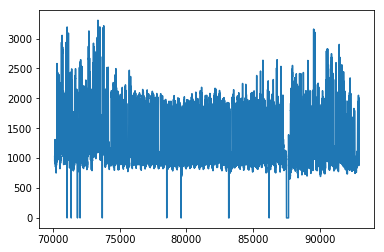

In [39]:
validation_data =  bms_save[training_end_index:]
validation_data.kW.plot()

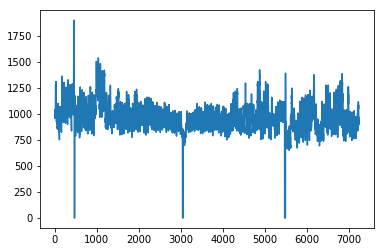

In [40]:
weekend_validation = validation_data[validation_data.Type_of_day != 'Normal_Weekday'].reset_index()
weekend_validation.kW.plot()

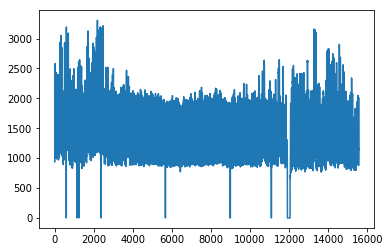

In [41]:
weekday_validation = validation_data[validation_data.Type_of_day == 'Normal_Weekday'].reset_index()
weekday_validation.kW.plot()

In [42]:
def fourier_weekend_prediction_terms(t):
    pred_value = weekend_params['const']
    for k in freqs.keys():
        pred_value += weekend_params[k + '_cos']*np.cos(freqs[k] * t)
        pred_value += weekend_params[k + '_sin']*np.sin(freqs[k] * t)
#     const  =   928.8323      
#     daily_cos =        -35.2935     
#     daily_sin  =       -69.3803     
#     yearly_cos  =       27.7699     
#     yearly_sin   =     -20.9136     
#     half_yearly_cos =    5.1950     
#     half_yearly_sin  =  11.0240     
#     twice_a_day_cos  =   3.7912     
#     twice_a_day_sin  =  28.6538  
#     predicted_value = (const 
#                        + daily_cos*np.cos(freqs['daily'] * t) + daily_sin*np.sin(freqs['daily'] * t) 
#                        + yearly_cos*np.cos(freqs['yearly'] * t) + yearly_sin*np.sin(freqs['yearly'] * t) 
#                        + half_yearly_cos *np.cos(freqs['half_yearly'] * t) 
#                        + half_yearly_sin*np.sin(freqs['half_yearly'] * t) 
#                        +  twice_a_day_cos *np.cos(freqs['twice_a_day'] * t) 
#                        + twice_a_day_sin*np.sin(freqs['twice_a_day'] * t)) 
    return(pred_value)


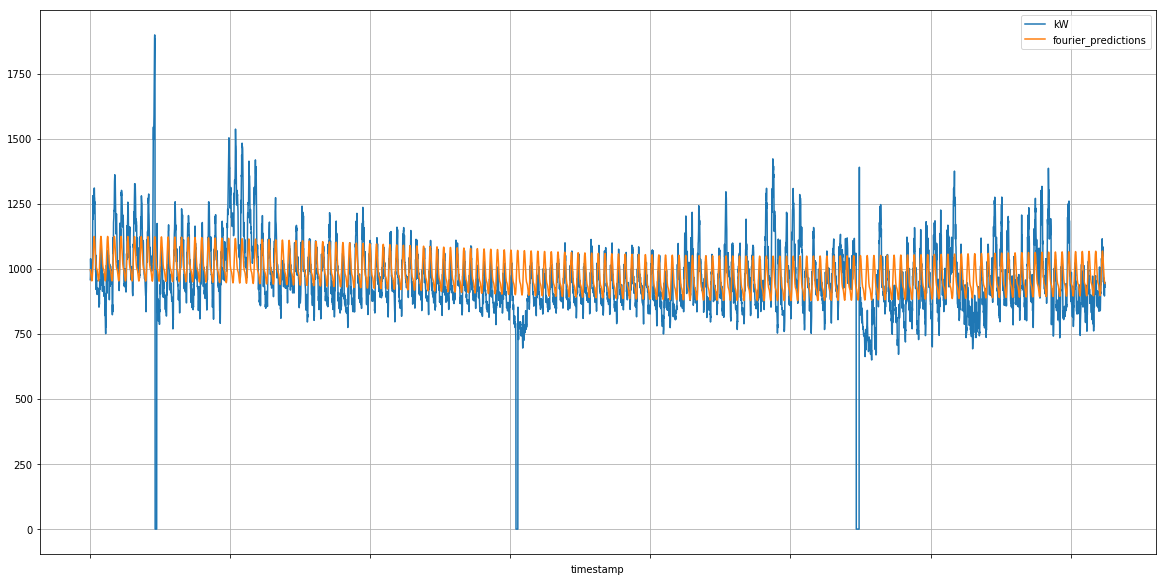

In [43]:
weekend_validation['indices'] = weekend_validation.index
weekend_validation['fourier_predictions'] = weekend_validation['indices'].apply(
    lambda x: fourier_weekend_prediction_terms(x))
weekend_validation.plot(x='timestamp', y=['kW','fourier_predictions'] ,figsize=(20,10), grid=True  )

In [44]:

def fourier_weekday_prediction_terms(t):
    pred_value = weekday_params['const']
    for k in freqs.keys():
        pred_value += weekday_params[k + '_cos']*np.cos(freqs[k] * t)
        pred_value += weekday_params[k + '_sin']*np.sin(freqs[k] * t)
#     const  =   928.8323      
#     daily_cos =        -35.2935     
#     daily_sin  =       -69.3803     
#     yearly_cos  =       27.7699     
#     yearly_sin   =     -20.9136     
#     half_yearly_cos =    5.1950     
#     half_yearly_sin  =  11.0240     
#     twice_a_day_cos  =   3.7912     
#     twice_a_day_sin  =  28.6538  
#     predicted_value = (const 
#                        + daily_cos*np.cos(freqs['daily'] * t) + daily_sin*np.sin(freqs['daily'] * t) 
#                        + yearly_cos*np.cos(freqs['yearly'] * t) + yearly_sin*np.sin(freqs['yearly'] * t) 
#                        + half_yearly_cos *np.cos(freqs['half_yearly'] * t) 
#                        + half_yearly_sin*np.sin(freqs['half_yearly'] * t) 
#                        +  twice_a_day_cos *np.cos(freqs['twice_a_day'] * t) 
#                        + twice_a_day_sin*np.sin(freqs['twice_a_day'] * t)) 
    return(pred_value)

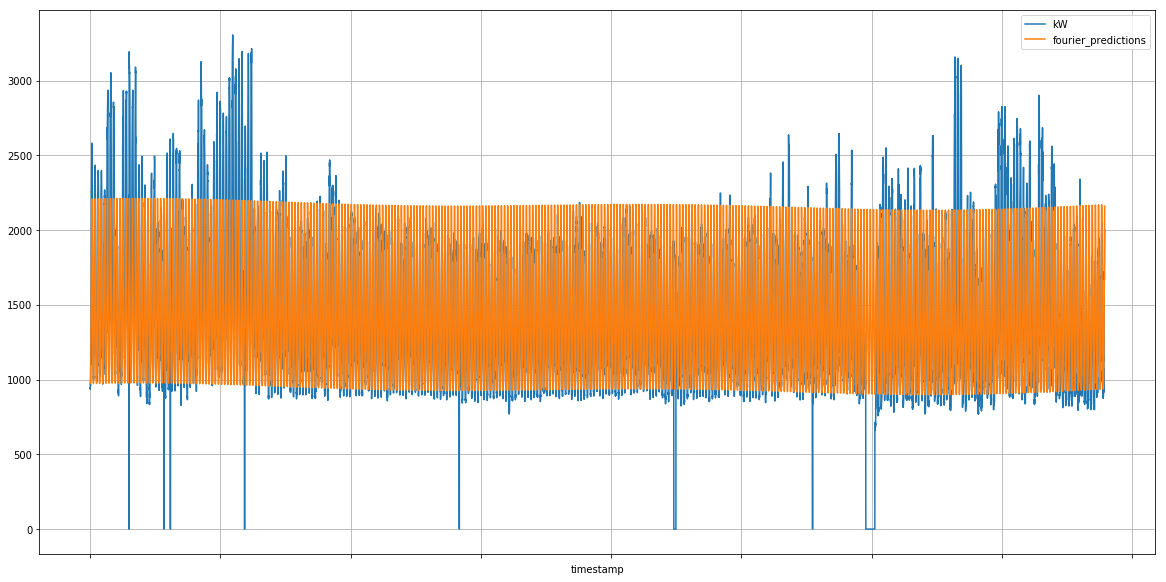

In [45]:
weekday_validation['indices'] = weekday_validation.index
weekday_validation['fourier_predictions'] = weekday_validation['indices'].apply(lambda x: fourier_weekday_prediction_terms(x))
weekday_validation.plot(x='timestamp', y=['kW','fourier_predictions'] ,figsize=(20,10), grid=True )

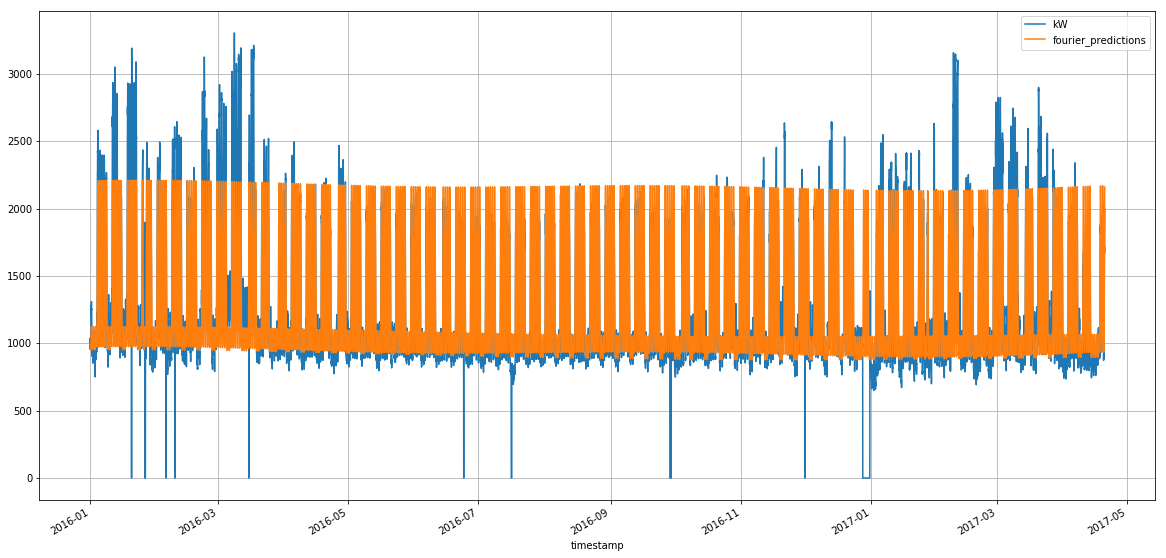

In [46]:
combined_validation = pd.concat([weekday_validation,weekend_validation], axis = 0).sort_values('timestamp').reset_index()
combined_validation.timestamp = pd.to_datetime(combined_validation.timestamp)
combined_validation.plot(x='timestamp', y=['kW','fourier_predictions'] ,figsize=(20,10), grid=True )

In [47]:
#Fourier predictions for future
future_resids = results3.predict(start = 0 , end = len(validation_data.index.values)-1, exog = validation_data[['Temp','Humidity']])
future_resids.values

array([  -1.53433237,  -91.76255441, -104.28222841, ...,   94.73478675,
        109.78674786,   71.8965388 ])

In [48]:
#Adding ARIMAX predictions to Fourier seasonal model
combined_validation['final_predictions'] = combined_validation['fourier_predictions'] + future_resids.values
combined_validation

,level_0,index,timestamp,kW,kVA,Temp,Humidity,Type_of_day,indices,fourier_predictions,final_predictions
0,0,70120,2016-01-01 00:00:00,958.5,1008.0,28.7,26.0,Public_holiday,0,996.345212,994.810880
1,1,70121,2016-01-01 00:30:00,969.8,1020.0,28.8,26.0,Public_holiday,1,994.096046,902.333491
2,2,70122,2016-01-01 01:00:00,1039.0,1102.7,28.3,25.0,Public_holiday,2,991.114578,886.832349
3,3,70123,2016-01-01 01:30:00,1009.6,1069.4,28.4,24.0,Public_holiday,3,987.339252,851.060685
4,4,70124,2016-01-01 02:00:00,968.2,1017.6,28.3,25.0,Public_holiday,4,982.818434,846.776290
5,5,70125,2016-01-01 02:30:00,964.2,1016.7,28.0,27.0,Public_holiday,5,977.710687,821.134985
6,6,70126,2016-01-01 03:00:00,959.0,1017.3,26.8,38.0,Public_holiday,6,972.276529,834.837731
7,7,70127,2016-01-01 03:30:00,976.5,1032.8,25.7,59.0,Public_holiday,7,966.862179,818.520348
8,8,70128,2016-01-01 04:00:00,994.3,1052.3,24.8,58.0,Public_holiday,8,961.876373,793.934017
9,9,70129,2016-01-01 04:30:00,988.8,1047.3,23.9,53.0,Public_holiday,9,957.761835,792.606113


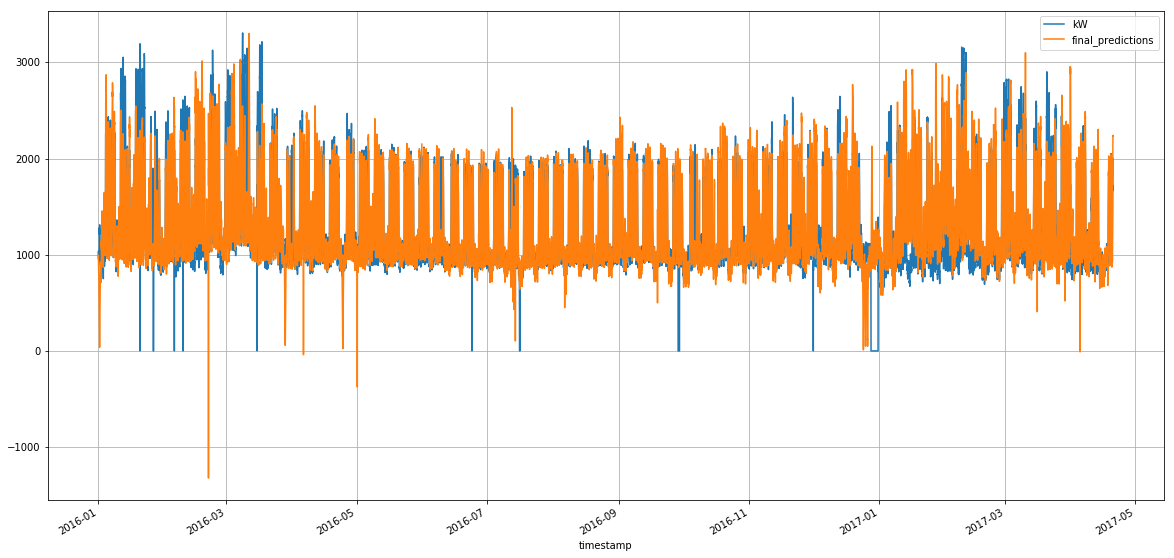

In [49]:
combined_validation.plot(x='timestamp', y=['kW','final_predictions'] ,figsize=(20,10), grid=True )

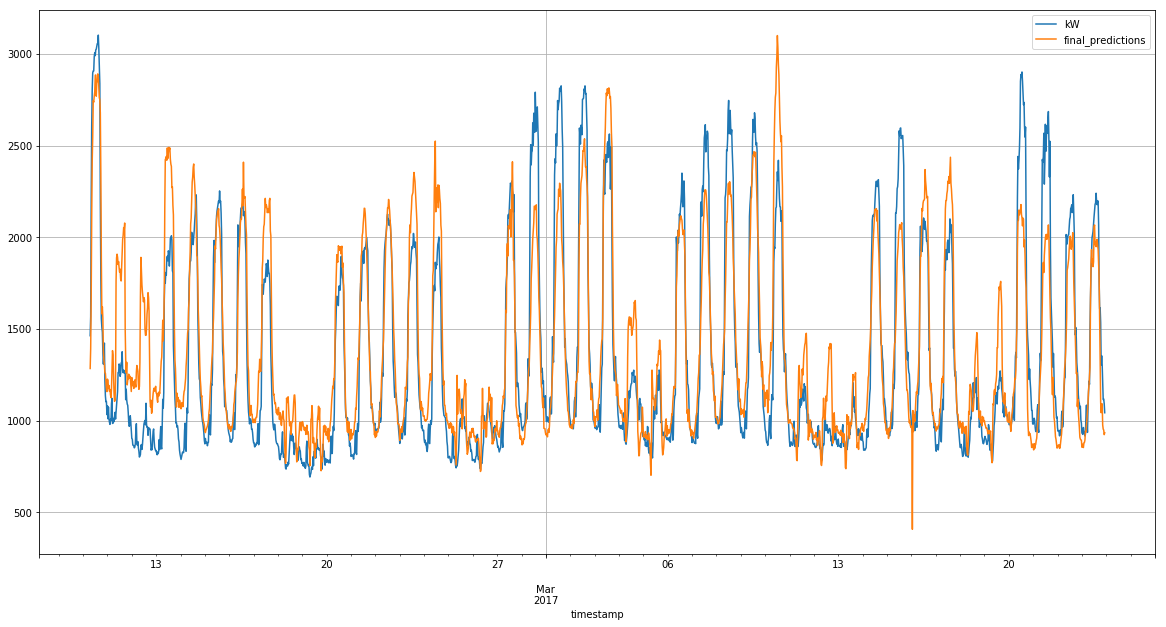

In [50]:
combined_validation.iloc[19_500:21_500].plot(x='timestamp', y=['kW','final_predictions'] ,figsize=(20,10), grid=True )

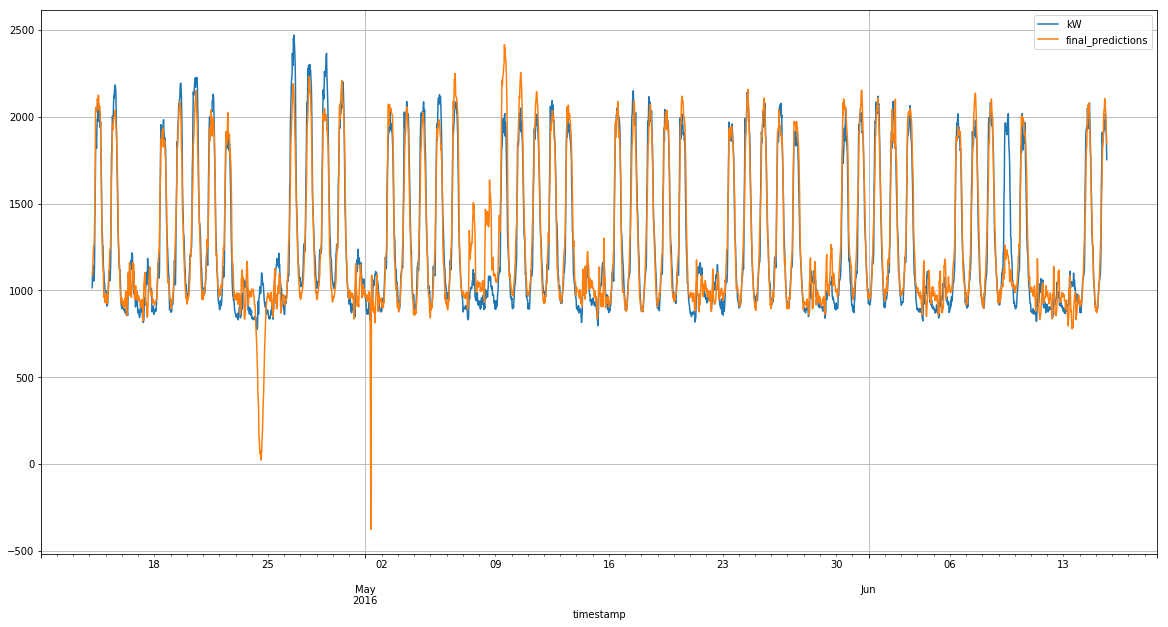

In [51]:
combined_validation.loc[5_000:8_000].plot(x='timestamp', y=['kW','final_predictions'] ,figsize=(20,10), grid=True )

In [52]:
combined_validation['Errors'] = combined_validation['final_predictions'] - combined_validation['kW']

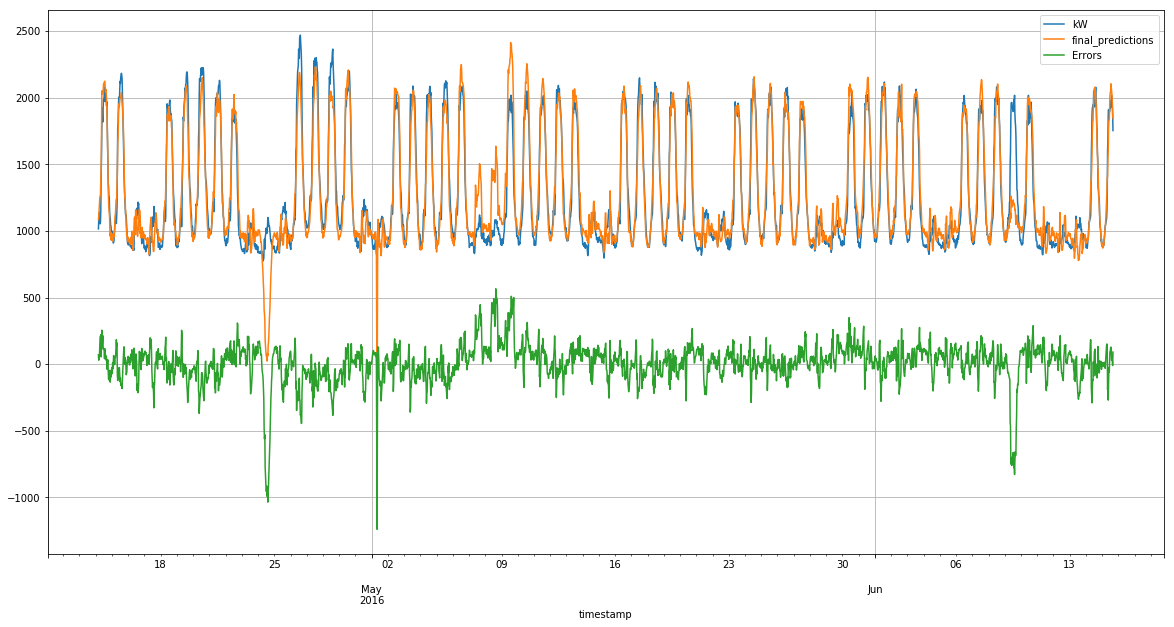

In [62]:
combined_validation.loc[5_000:8_000].plot.line(x='timestamp', y=['kW','final_predictions', 'Errors'] ,figsize=(20,10), grid=True, )

plt.show()

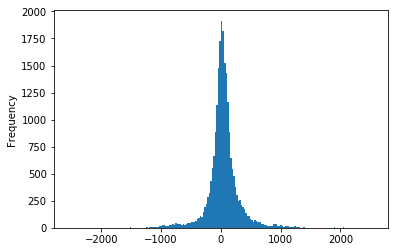

In [54]:
combined_validation['Errors'].plot.hist(bins=200)

In [55]:
combined_validation['Errors'].describe()

count    22824.000000
mean        41.279415
std        270.842955
min      -2541.981529
25%        -57.133035
50%         30.230142
75%        128.578672
max       2547.180142
Name: Errors, dtype: float64

# evaluate the performance of the system

In [56]:
#Divide estimates into Thermal / electric loads and export for cost calculation
combined_validation['thermal load (kWr)'] = combined_validation['final_predictions'] * 0.60
combined_validation['electrical load (kWe)'] = combined_validation['final_predictions'] * 0.40
combined_validation.to_csv('final_prediction.csv', sep = '\t')

In [57]:
combined_validation.columns

Index(['level_0', 'index', 'timestamp', 'kW', 'kVA', 'Temp', 'Humidity',
       'Type_of_day', 'indices', 'fourier_predictions', 'final_predictions',
       'Errors', 'thermal load (kWr)', 'electrical load (kWe)'],
      dtype='object')

In [58]:
combined_validation[['timestamp','thermal load (kWr)','electrical load (kWe)',
                     'Temp','Humidity']].to_csv('complete_short.tsv', sep='\t', index=False)

In [59]:
import sys, string, os

def run_cooling_exe(inputfile, outputfile):
    filename = "Cooling.exe " + inputfile + " " + outputfile
    return os.system(filename) 

In [60]:
def calculate_costs(output):
    #Cost calculation Sample input data
    output['final_consumption'] = (output['thermal load (kW)']/output['COP']) + output['electrical load (kW)'] - output['solar (kW)']
    output['final_cost'] = np.where(output['final_consumption'] > 0, output['final_consumption']* output['import price ($/kWh)'] * 2, output['final_consumption']* output['export price ($/kWh)'] * 2)
    #final total cost for the input data
    total_cost =  output.final_cost.sum()
    return total_cost

In [61]:
#Sample input to cooling exe
sample_input = pd.read_csv("tmp_fwindow.tsv", sep = '\t',skiprows = 7)

FileNotFoundError: File b'tmp_fwindow.tsv' does not exist

In [ ]:
#construct baseline input file
baseline_input = sample_input
baseline_input.drop(baseline_input.index, inplace = True)
baseline_input['time'] = combined_validation['TimeStamp'][0:144]
avg_thermal_load = combined_validation['thermal load (kWr)'].mean()
baseline_input['thermal load (kWr)'] = avg_thermal_load

avg_electrical_load = combined_validation['electrical load (kWe)'].mean()
baseline_input['electrical load (kWe)'] = avg_electrical_load

#Import prices, export prices and demand prices
Luis_file = pd.read_csv("3dayInputData.csv")
baseline_input['CoP'] = Luis_file['CoP']
baseline_input['import price ($/kWh)'] = Luis_file['adj_cpkWh']
baseline_input['export price ($/kWh)'] = Luis_file['exp_cpkWh']
baseline_input['demand price ($/kW)'] = Luis_file['tou_cpkWh']


#Average Solar imported from other prediction
solar_predictions = pd.read_csv("../code/solar_pv_forecasts.csv")
baseline_input['solar (kWe)'] = solar_predictions.mean_model
baseline_input

#export baseline input file and later add first 7 rows manually
baseline_input.to_csv('baseline_input.tsv', sep = '\t', index = False)

In [ ]:
#construct predicted input file
predicted_input = sample_input
predicted_input.drop(predicted_input.index, inplace = True)
predicted_input['time'] = combined_validation['TimeStamp'][0:144]

predicted_input['thermal load (kWr)'] = combined_validation['thermal load (kWr)']

predicted_input['electrical load (kWe)'] = combined_validation['electrical load (kWe)']

#Import prices, export prices and demand prices
Luis_file = pd.read_csv("3dayInputData.csv")
predicted_input['CoP'] = Luis_file['CoP']
predicted_input['import price ($/kWh)'] = Luis_file['adj_cpkWh']
predicted_input['export price ($/kWh)'] = Luis_file['exp_cpkWh']
predicted_input['demand price ($/kW)'] = Luis_file['tou_cpkWh']


#Average Solar imported from other prediction
solar_predictions = pd.read_csv("../code/solar_pv_forecasts.csv")
predicted_input['solar (kWe)'] = solar_predictions.GHI_pred
predicted_input

#export predicted input file and later add first 7 rows manually
predicted_input.to_csv('predicted_input.tsv', sep = '\t', index = False)

In [ ]:
#construct actual input file
actual_input = sample_input
actual_input.drop(actual_input.index, inplace = True)
actual_input['time'] = combined_validation['TimeStamp'][0:144]

actual_input['thermal load (kWr)'] = combined_validation['kW_est'] * 0.60

actual_input['electrical load (kWe)'] = combined_validation['kW_est'] * 0.40

#Import prices, export prices and demand prices
Luis_file = pd.read_csv("3dayInputData.csv")
actual_input['CoP'] = Luis_file['CoP']
actual_input['import price ($/kWh)'] = Luis_file['adj_cpkWh']
actual_input['export price ($/kWh)'] = Luis_file['exp_cpkWh']
actual_input['demand price ($/kW)'] = Luis_file['tou_cpkWh']


#Average Solar imported from other prediction
solar_predictions = pd.read_csv("../code/solar_pv_forecasts.csv")
actual_input['solar (kWe)'] = solar_predictions.GHI_observed
actual_input

#export predicted input file and later add first 7 rows manually
actual_input.to_csv('actual_input.tsv', sep = '\t', index = False)

In [ ]:
#run cooling exe file with sample input
def run_cost_calculation(inputfilename, outputfilename):
    status = run_cooling_exe(inputfilename, outputfilename)
    if(status == 0):
        print("Successful")
        output = pd.read_csv(outputfilename + ".tsv", sep = '\t')
        cost = calculate_costs(output)
        print("The final cost is: ")
        print(cost)
    else:
        print("Not successful")


In [ ]:
run_cost_calculation("tmp_fwindow", "sample_output")

In [ ]:
run_cost_calculation("baseline_input", "baseline_output")

In [ ]:
run_cost_calculation("predicted_input", "predicted_output")

In [ ]:
1394352.8324047616 - 1277596.031578

In [ ]:
run_cost_calculation("actual_input", "actual_output")

In [ ]:
1277596.031578 - 713289.9536772382